In [525]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [526]:
raw_data = pd.read_csv("E:\\python\\heartdisease_data.csv",names=['age','sex','cp','trestbps','chol',
'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'],header=0)
#Here I am giving names to each column in header of the dataset for ease of understanding.

In [527]:
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [528]:
raw_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [529]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [530]:
# Raw data analysis show that there are multiple entries with value '?' instead of nan or 0. We are going to replace
# ? with appropriate values.

In [531]:
raw_data=raw_data.replace('?',np.nan) #here we are replacing '?' with NaN value

In [532]:
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [533]:
raw_data.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
num           0
dtype: int64

In [534]:
raw_data.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [535]:
#From isnull().sum() we can see that multiple columns are having nan/null values. Now we need to replace these nan values
#with proper values which will be used for model building
#header(3) is 'trestbps' which is numerice has 56 nan values. we will replace it with mean value
#header(4) is 'chol' which is numerice has 7 nan values. we will replace it with mean value
#header(5) is 'fbs' which is numerice has 7 nan values but has only 2 unique values of 0 and 1. We will replace nan values
#with mode/most used value in this column.
#header(7) is 'thalach' which is numerice has 53 nan values. we will replace it with mean value in that column since values in 
#this column is in int and not in float.
#header(8) is 'exang' which is numerice has 53 nan values but has only 2 unique values of 0 and 1. We will replace nan values
#with mode/most used value in this column.
#header(9) is 'oldpeak' which is numerice has 56 nan values. we will replace it with mean value
#header(10) is 'slope' which is numerice has 102 nan values but has only 3 unique values of 1,2 and 3. We will replace nan values
#with mode/most used value in this column.
#header(11) is 'CA' which has 197 NaN values from total count of 199. hence I am dropping this column.
#header(12) is 'thal' which has 165 NaN values from total count of 199. hence I am dropping this column.

In [536]:
del_rec = raw_data.iloc[:,11:13]
raw_data.drop(del_rec,axis=1,inplace=True)
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,44,1,4,130,209,0,1,127,0,0,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,0


In [537]:
mean_rec = raw_data.iloc[:,[3,4,9]]
for i in mean_rec:
    raw_data[i] = raw_data[i].astype(float)
    raw_data[i] = raw_data[i].replace(np.nan,0)
    raw_data[i] = raw_data[i].fillna(raw_data[i].mean()) #here we are replacing NaN value with mean value.
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,44,1,4,130.0,209.0,0,1,127,0,0.0,NaN,0
1,60,1,4,132.0,218.0,0,1,140,1,1.5,3,2
2,55,1,4,142.0,228.0,0,1,149,1,2.5,1,1
3,66,1,3,110.0,213.0,1,2,99,1,1.3,2,0
4,66,1,3,120.0,0.0,0,1,120,0,-0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1,1,154,0,0.0,NaN,1
195,62,1,1,0.0,139.0,0,1,NaN,NaN,0.0,NaN,0
196,55,1,4,122.0,223.0,1,1,100,0,0.0,NaN,2
197,58,1,4,0.0,385.0,1,2,NaN,NaN,0.0,NaN,0


In [538]:
mode_rec = raw_data.iloc[:,[5,8,10]]
for i in mode_rec:
    raw_data[i] = raw_data[i].astype(float)
    #raw_data[i] = raw_data[i].replace(np.nan,0)
    #raw_data[i] = raw_data[i].fillna(raw_data[i].mean())
    raw_data[i] = raw_data[i].replace(np.nan,raw_data[i].value_counts().index[0])  
    #here we are replacing NaN value with mode value.
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,44,1,4,130.0,209.0,0.0,1,127,0.0,0.0,2.0,0
1,60,1,4,132.0,218.0,0.0,1,140,1.0,1.5,3.0,2
2,55,1,4,142.0,228.0,0.0,1,149,1.0,2.5,1.0,1
3,66,1,3,110.0,213.0,1.0,2,99,1.0,1.3,2.0,0
4,66,1,3,120.0,0.0,0.0,1,120,0.0,-0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154,0.0,0.0,2.0,1
195,62,1,1,0.0,139.0,0.0,1,NaN,1.0,0.0,2.0,0
196,55,1,4,122.0,223.0,1.0,1,100,0.0,0.0,2.0,2
197,58,1,4,0.0,385.0,1.0,2,NaN,1.0,0.0,2.0,0


In [539]:
raw_data['thalach'] = raw_data['thalach'].astype(float)
raw_data['thalach'] = raw_data['thalach'].replace(np.nan,raw_data['thalach'].mean()) 
#here we are replacing NaN value with mean value.
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,44,1,4,130.0,209.0,0.0,1,127.000000,0.0,0.0,2.0,0
1,60,1,4,132.0,218.0,0.0,1,140.000000,1.0,1.5,3.0,2
2,55,1,4,142.0,228.0,0.0,1,149.000000,1.0,2.5,1.0,1
3,66,1,3,110.0,213.0,1.0,2,99.000000,1.0,1.3,2.0,0
4,66,1,3,120.0,0.0,0.0,1,120.000000,0.0,-0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.000000,0.0,0.0,2.0,1
195,62,1,1,0.0,139.0,0.0,1,122.869863,1.0,0.0,2.0,0
196,55,1,4,122.0,223.0,1.0,1,100.000000,0.0,0.0,2.0,2
197,58,1,4,0.0,385.0,1.0,2,122.869863,1.0,0.0,2.0,0


In [540]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [541]:
raw_data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
num           int64
dtype: object

In [542]:
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,44,1,4,130.0,209.0,0.0,1,127.000000,0.0,0.0,2.0,0
1,60,1,4,132.0,218.0,0.0,1,140.000000,1.0,1.5,3.0,2
2,55,1,4,142.0,228.0,0.0,1,149.000000,1.0,2.5,1.0,1
3,66,1,3,110.0,213.0,1.0,2,99.000000,1.0,1.3,2.0,0
4,66,1,3,120.0,0.0,0.0,1,120.000000,0.0,-0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.000000,0.0,0.0,2.0,1
195,62,1,1,0.0,139.0,0.0,1,122.869863,1.0,0.0,2.0,0
196,55,1,4,122.0,223.0,1.0,1,100.000000,0.0,0.0,2.0,2
197,58,1,4,0.0,385.0,1.0,2,122.869863,1.0,0.0,2.0,0


<AxesSubplot:>

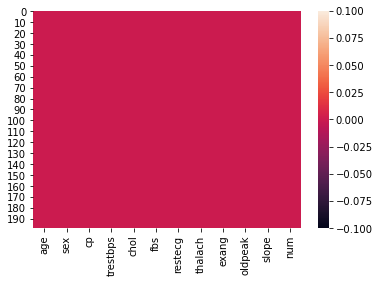

In [543]:
sns.heatmap(raw_data.isnull()) # heatmap also indicates that there are no null values in dataset.

In [544]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,96.090452,172.050251,0.341709,0.733668,122.869863,0.738693,0.940704,2.065327,1.517588
std,7.827080,0.171433,0.796928,62.999614,116.880788,0.475479,0.684918,18.867497,0.440455,1.103530,0.472211,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,122.000000,214.000000,0.000000,1.000000,122.869863,1.000000,0.500000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


In [545]:
#from describe method we can see that for columns 'trestbps' and 'chol', difference between min value and max value is huge. 

In [546]:
raw_data.skew()

age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -0.742397
chol       -0.461558
fbs         0.672579
restecg     0.396540
thalach     0.137597
exang      -1.094854
oldpeak     0.838673
slope       0.207950
num         0.302681
dtype: float64

In [547]:
#Industry recomended values for skewness is between -3 and +3, we can see all values are within this range which shows that
#there is now skewness in data.

age            AxesSubplot(0.125,0.536818;0.110714x0.343182)
sex         AxesSubplot(0.257857,0.536818;0.110714x0.343182)
cp          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
trestbps    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chol        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
fbs         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
restecg           AxesSubplot(0.125,0.125;0.110714x0.343182)
thalach        AxesSubplot(0.257857,0.125;0.110714x0.343182)
exang          AxesSubplot(0.390714,0.125;0.110714x0.343182)
oldpeak        AxesSubplot(0.523571,0.125;0.110714x0.343182)
slope          AxesSubplot(0.656429,0.125;0.110714x0.343182)
num            AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

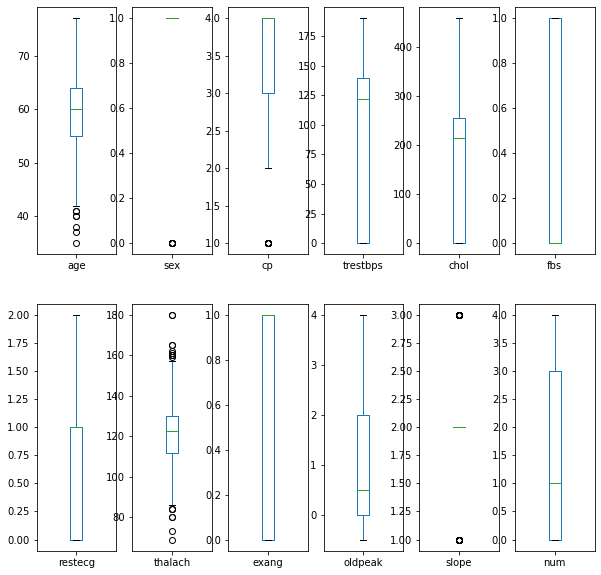

In [548]:
raw_data.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [549]:
#Here we can see columns 'Age' and 'thalach' has most outliers. For age we can see values lies between 35 and 77 which looks
# to be normal values for age.

In [550]:
Q1=raw_data.quantile(0.25)
Q3=raw_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age           9.0
sex           0.0
cp            1.0
trestbps    140.0
chol        254.0
fbs           1.0
restecg       1.0
thalach      18.0
exang         1.0
oldpeak       2.0
slope         0.0
num           3.0
dtype: float64


In [551]:
print(raw_data < (Q1 - 1.5 * IQR)) or (raw_data> (Q3 + 1.5 * IQR))

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
194  False   True  False     False  False  False    False    False  False   
195  False  False   True     False  False  False    False    False  False   
196  False  False  False     False  False  False    False    False  False   
197  False  False  False     False  False  False    False    False  False   
198  False  False  False     False  False  False    False    False  False   

     oldpeak  slope    num  
0      False  False  False  
1      False  Fal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False


In [552]:
from scipy.stats import zscore
z=np.abs(zscore(raw_data))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 0.85459907, 0.13869083,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 0.50810297, 1.98434575,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 1.41657101, 2.26172741,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.85459907, 0.13869083,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 0.85459907, 0.13869083,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 0.85459907, 0.13869083,
        0.42461322]])

In [553]:
threshold =3
print(np.where(z<3))
print(raw_data.shape)

(array([  0,   0,   0, ..., 198, 198, 198], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(199, 12)


In [554]:
data_new = raw_data[(z<3).all(axis = 1)]

In [555]:
data_new.shape

(182, 12)

In [556]:
#since number of rows in dataset is only 199 and new dataset after removing outliers through zscore method have 17 less records.
#I am not going to use new data set and will include outliers in my model building process 

In [557]:
#raw_data = data_new

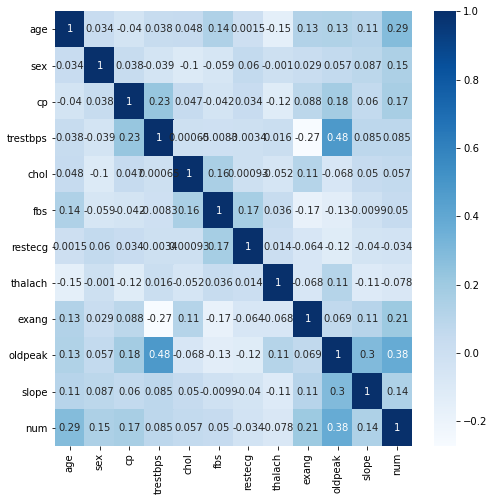

In [558]:
corr_hmap=raw_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_hmap,annot=True,cmap="Blues")
plt.show()

In [559]:
#from above heat map we can see most of the values/columns are positively correlated with each other.

In [560]:
raw_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [561]:
x = raw_data.iloc[:,0:-1]
x.shape

(199, 11)

In [562]:
y = raw_data.iloc[:,-1]
y.shape

(199,)

In [563]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [564]:
scale = StandardScaler()

In [565]:
x=scale.fit_transform(x)

In [566]:
x.shape

(199, 11)

In [579]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]
max_score = 0
for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=accuracy_score(pred,test_y)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.55 of model: DecisionTreeClassifier() with best random state value is: 93


In [568]:
dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
dtc.fit(train_x,train_y)
preddtc = dtc.predict(test_x)
print("Predicted values using DecisionTree model:\n",preddtc)
print("Accuracy score:",accuracy_score(preddtc,test_y))
print("Confusion matrix:\n", confusion_matrix(test_y, preddtc))
print("Classification report:",classification_report(test_y,preddtc))

Predicted values using DecisionTree model:
 [2 0 1 3 0 0 0 3 1 1 4 1 0 2 2 0 3 3 0 2 0 1 0 3 2 0 3 2 1 3 2 3 0 2 3 0 2
 1 3 3]
Accuracy score: 0.3
Confusion matrix:
 [[3 1 1 5 0]
 [6 4 4 1 0]
 [1 1 2 2 1]
 [2 1 2 3 0]
 [0 0 0 0 0]]
Classification report:               precision    recall  f1-score   support

           0       0.25      0.30      0.27        10
           1       0.57      0.27      0.36        15
           2       0.22      0.29      0.25         7
           3       0.27      0.38      0.32         8
           4       0.00      0.00      0.00         0

    accuracy                           0.30        40
   macro avg       0.26      0.25      0.24        40
weighted avg       0.37      0.30      0.31        40



In [569]:
cross_score=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score is=",cross_score.std())

Cross validation score is= [0.275      0.325      0.4        0.375      0.46153846]
Cross validation mean score is= 0.36730769230769234
Cross validation standard deviation score is= 0.06374644670454677


In [570]:
from sklearn.metrics import roc_auc_score,roc_curve

In [571]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [572]:
abc = AdaBoostClassifier(n_estimators=50,base_estimator=dtc,learning_rate=1)
#dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
abc.fit(train_x,train_y)
predabc = abc.predict(test_x)
print("Predicted values using AdaBoostClassifier model:\n",predabc)
print("Accuracy score:",accuracy_score(predabc,test_y))

Predicted values using AdaBoostClassifier model:
 [2 1 1 3 0 0 3 3 1 1 4 1 0 2 0 0 3 3 0 2 0 1 0 3 0 0 0 2 1 3 2 3 0 2 0 0 0
 2 3 1]
Accuracy score: 0.3


In [573]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
temp_score = 0
temp_rate = 0
for i in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=i, max_features=2, max_depth=2, random_state=final_temp_state)
    gb_clf.fit(train_x,train_y)   
    score = gb_clf.score(test_x, test_y)
    if score > temp_score:
        temp_score = score
        temp_rate = i
print("Best learnin rate is:",temp_rate)
print("Best learning score is:",temp_score)

Best learnin rate is: 0.05
Best learning score is: 0.4


In [574]:
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=temp_rate, max_features=2, max_depth=2, random_state=final_temp_state)
gb_clf.fit(train_x,train_y)
predgb = gb_clf.predict(test_x)
#score = gb_clf.score(test_x, test_y)
print("Accuracy score:",accuracy_score(predgb,test_y))

Accuracy score: 0.4


[0.   0.04 0.04 0.08 0.08 0.12 0.12 0.24 0.24 0.36 0.36 0.4  0.4  0.48
 0.48 0.64 0.64 0.84 0.84 1.   1.  ]
[0.         0.         0.2        0.2        0.26666667 0.26666667
 0.33333333 0.33333333 0.4        0.4        0.46666667 0.46666667
 0.53333333 0.53333333 0.73333333 0.73333333 0.8        0.8
 0.86666667 0.86666667 1.        ]
[1.46019452 0.46019452 0.34489901 0.33508287 0.33290013 0.33175417
 0.32589499 0.31098261 0.30893235 0.27899742 0.26467824 0.24819762
 0.2403348  0.21750182 0.21290327 0.17465053 0.16829091 0.15591634
 0.15349782 0.12153194 0.10232218]


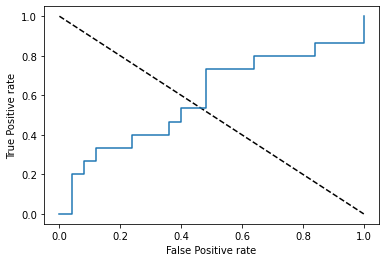

In [575]:
probability = gb_clf.predict_proba(test_x)[:,1]
probability
fpr,tpr,threshold = roc_curve(test_y,probability,pos_label=True)
print(fpr)
print(tpr)
print(threshold)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "DecisionTreeClassifier")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [576]:
#Here AUC/ROC curve also indicates that only around 50-55% of area lies within the curve.
#By using different algorithms and ensembling techniques also we are getting best score of 50% only.

In [577]:
output_data_gbc=pd.DataFrame(predgb)
output_data_gbc.to_csv("E:\\python\\heartdisease_prediction.csv",header=0)

In [578]:
import joblib
joblib.dump(gb_clf,'E:\\python\\heartdisease_prediction.obj')

['E:\\python\\heartdisease_prediction.obj']